In [1]:
import matplotlib.pyplot as plt
import os
import pandas as pd
import yaml

In [2]:
#df = pd.read_csv(f'example_results/lightning_logs/tmp_exp/version_{68}/metrics.csv')
#df = pd.read_csv(f'example_results/lightning_logs/tmp_exp/version_{70}/metrics.csv')

#df = pd.read_csv(f'example_results/lightning_logs/tmp_exp/version_{72}/metrics.csv')
#df = pd.read_csv(f'example_results/lightning_logs/tmp_exp/version_{87}/metrics.csv')
#df = pd.read_csv(f'example_results/lightning_logs/tmp_exp/version_{96}/metrics.csv')



In [3]:
the_dir = "example_results/lightning_logs/exp1_oct_no_fc_ci_random/version_0"

df = pd.read_csv(os.path.join(the_dir, 'metrics.csv'))
df

,val_f1,val_prec,lr-SGD,epoch,val_acc,step,val_cc,val_loss,train_acc,train_prec,unpruned,unpruned_state,train_f1,train_loss,train_cc
0,NaN,NaN,0.001000,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.625000,0.499524,NaN,0.0,0.625000,31,4.800539,1.015890,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,0.0,NaN,31,NaN,NaN,0.546387,0.323905,5980.0,-1.0,0.546387,1.157735,4.800539
3,NaN,NaN,0.001000,NaN,NaN,32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.664062,0.529209,NaN,1.0,0.664062,63,4.800539,0.924890,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,0.498047,0.311718,NaN,48.0,0.498047,1567,4.699136,1.197122,NaN,NaN,NaN,NaN,NaN,NaN,NaN
146,NaN,NaN,NaN,48.0,NaN,1567,NaN,NaN,0.508545,0.326719,1600.0,-1.0,0.508545,1.167897,4.699136
147,NaN,NaN,0.000521,NaN,NaN,1568,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
148,0.503906,0.307243,NaN,49.0,0.503906,1599,4.699136,1.184954,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
stream = open(os.path.join(the_dir, 'hparams.yaml'), 'r')
data = yaml.load(stream, Loader=yaml.Loader)
data

{'kwargs': {'model_kwargs': {'base_lr': 0.001,
   'cc_metric': 'l2',
   'cc_weight': 10,
   'ci_metric': 'random',
   'cm_metric': 'count',
   'criterion': CrossEntropyLoss(),
   'grid_size': 324,
   'lr_update': 100,
   'min_lr': 1e-05,
   'momentum': 0.9,
   'n_classes': 4,
   'optimizer': 'sgd',
   'out_dim': [1, 8, 16, 32, 4],
   'pretrain_epochs': 20,
   'prune_keep': 0.8,
   'prune_keep_total': 0.3,
   'update_every_nth_epoch': 5},
  'train_kwargs': {'batch_size': 128,
   'device': 'cuda',
   'epochs': 100,
   'exp_name': 'exp1_oct_no_fc_ci_random',
   'img_size': 28,
   'load_ckpt_file': 'xversion_22/checkpoints/epoch=0-unpruned=10942-val_f1=0.06.ckpt',
   'log_every_n_steps': 4,
   'num_workers': 18,
   'result_path': 'examples/example_results',
   'test_size': 24,
   'train_size': 4096,
   'val_size': 512}},
 'log_dir': 'examples/example_results\\lightning_logs\\exp1_oct_no_fc_ci_random\\version_0'}

In [5]:
cc_metric = data['kwargs']['model_kwargs']['cc_metric']

In [6]:
ci_metric = data['kwargs']['model_kwargs']['ci_metric']

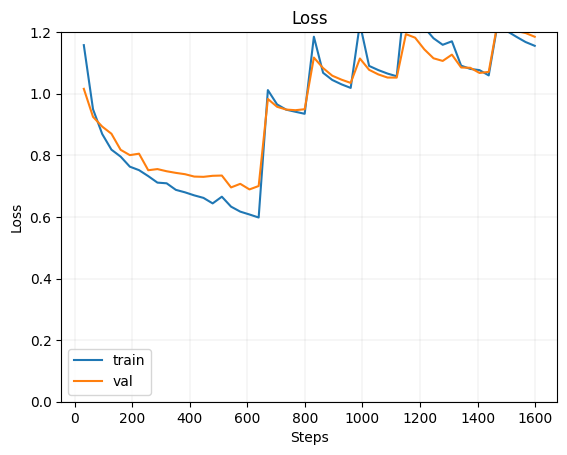

In [7]:
# Assuming your DataFrame has columns 'X' and 'Y'
val_df = df[['step', 'val_loss']].dropna()
x_val = val_df['step']
y_val = val_df['val_loss']

train_df = df[['step', 'train_loss']].dropna()
x_train = train_df['step']
y_train = train_df['train_loss']


# Create a line plot
plt.plot(x_train, y_train, label="train")
plt.plot(x_val, y_val, label="val")

# Set plot labels and title
plt.xlabel('Steps')
plt.ylabel('Loss')
plt.title('Loss')
plt.grid(color='k', linestyle='-', linewidth=0.05)

ax = plt.gca()
ax.set_ylim([0,1.2])

plt.legend()

plt.savefig(os.path.join(the_dir, 'metric_loss.png'))

# Show the plot
plt.show()



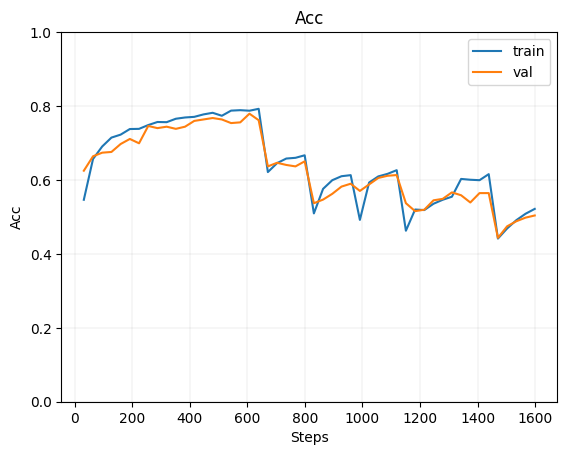

In [8]:
import matplotlib.pyplot as plt

# Assuming your DataFrame has columns 'X' and 'Y'
val_df = df[['step', 'val_acc']].dropna()
x_val = val_df['step']
y_val = val_df['val_acc']

train_df = df[['step', 'train_acc']].dropna()
x_train = train_df['step']
y_train = train_df['train_acc']


# Create a line plot
plt.plot(x_train, y_train, label="train")
plt.plot(x_val, y_val, label="val")

# Set plot labels and title
plt.xlabel('Steps')
plt.ylabel('Acc')
plt.title('Acc')
plt.grid(color='k', linestyle='-', linewidth=0.05)

ax = plt.gca()
ax.set_ylim([0,1])


plt.legend()

plt.savefig(os.path.join(the_dir, 'metric_acc.png'))


# Show the plot
plt.show()


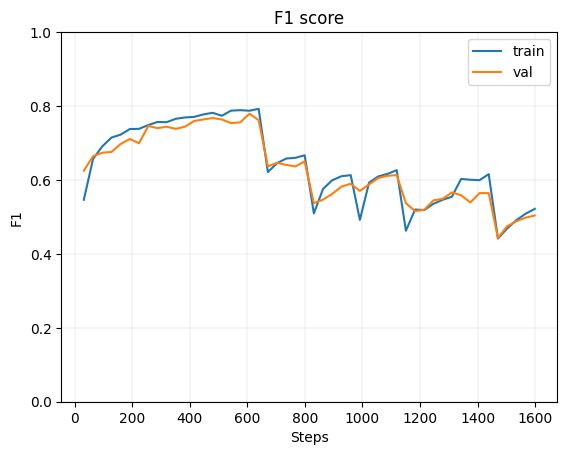

In [9]:
import matplotlib.pyplot as plt

# Assuming your DataFrame has columns 'X' and 'Y'
val_df = df[['step', 'val_f1']].dropna()
x_val = val_df['step']
y_val = val_df['val_f1']

train_df = df[['step', 'train_f1']].dropna()
x_train = train_df['step']
y_train = train_df['train_f1']


# Create a line plot
plt.plot(x_train, y_train, label="train")
plt.plot(x_val, y_val, label="val")

# Set plot labels and title
plt.xlabel('Steps')
plt.ylabel('F1')
plt.title('F1 score')
plt.grid(color='k', linestyle='-', linewidth=0.05)

ax = plt.gca()
ax.set_ylim([0,1])

plt.legend()

plt.savefig(os.path.join(the_dir, 'metric_f1.png'))

# Show the plot
plt.show()


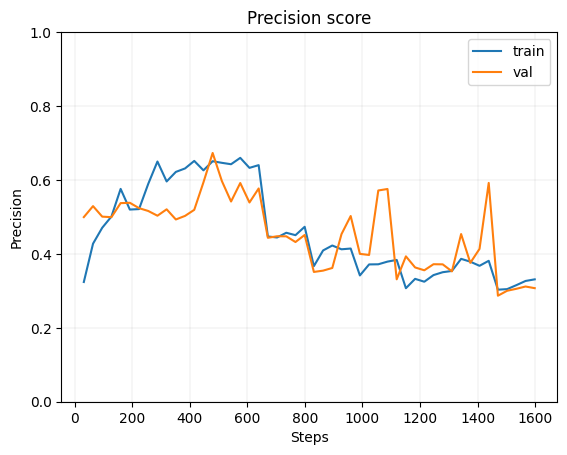

In [10]:
import matplotlib.pyplot as plt

# Assuming your DataFrame has columns 'X' and 'Y'
val_df = df[['step', 'val_prec']].dropna()
x_val = val_df['step']
y_val = val_df['val_prec']

train_df = df[['step', 'train_prec']].dropna()
x_train = train_df['step']
y_train = train_df['train_prec']


# Create a line plot
plt.plot(x_train, y_train, label="train")
plt.plot(x_val, y_val, label="val")

# Set plot labels and title
plt.xlabel('Steps')
plt.ylabel('Precision')
plt.title('Precision score')
plt.grid(color='k', linestyle='-', linewidth=0.05)


ax = plt.gca()
ax.set_ylim([0,1])

plt.legend()

plt.savefig(os.path.join(the_dir, 'metric_prec.png'))


# Show the plot
plt.show()


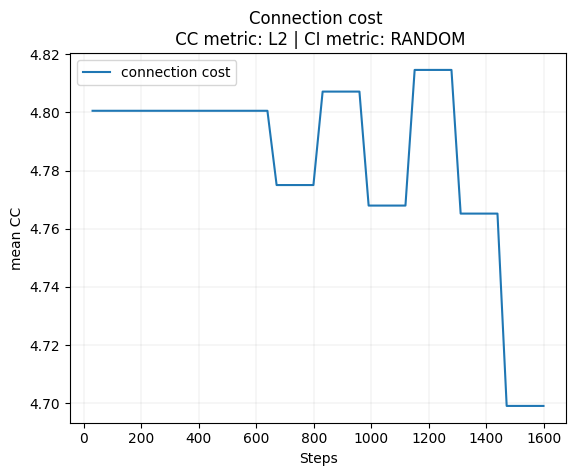

In [11]:
import matplotlib.pyplot as plt

train_df = df[['step', 'train_cc']].dropna()
x_train = train_df['step']
y_train = train_df['train_cc']


# Create a line plot
plt.plot(x_train, y_train, label="connection cost")

# Set plot labels and title
plt.xlabel('Steps')
plt.ylabel('mean CC')
plt.title(f'Connection cost \n CC metric: {cc_metric.upper()} | CI metric: {ci_metric.upper()}')
plt.grid(color='k', linestyle='-', linewidth=0.05)

ax = plt.gca()
# ax.set_ylim([0.075,0.125])


plt.legend()

plt.savefig(os.path.join(the_dir, 'metric_cc.png'))


# Show the plot
plt.show()


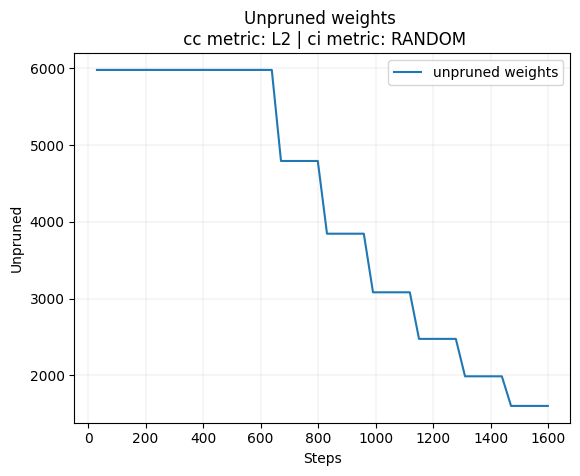

In [12]:
import matplotlib.pyplot as plt

train_df = df[['step', 'unpruned']].dropna()
x_train = train_df['step']
y_train = train_df['unpruned']


# Create a line plot
plt.plot(x_train, y_train, label="unpruned weights")

# Set plot labels and title
plt.xlabel('Steps')
plt.ylabel('Unpruned')
plt.title(f'Unpruned weights \n cc metric: {cc_metric.upper()} | ci metric: {ci_metric.upper()}')
plt.grid(color='k', linestyle='-', linewidth=0.05)

ax = plt.gca()
# ax.set_ylim([0.075,0.125])


plt.legend()

plt.savefig(os.path.join(the_dir, 'metric_unpruned.png'))


# Show the plot
plt.show()


In [13]:
val_df

,step,val_prec
1,31,0.499524
4,63,0.529209
7,95,0.500759
10,127,0.499321
13,159,0.537328
16,191,0.538247
19,223,0.523735
22,255,0.516097
25,287,0.503288
28,319,0.520567


In [14]:
40*300

12000

In [15]:
list(set(df['step']))

[0,
 512,
 1024,
 1536,
 1023,
 31,
 32,
 543,
 544,
 1055,
 1056,
 1567,
 1568,
 1535,
 63,
 64,
 575,
 576,
 1087,
 1088,
 1599,
 95,
 1120,
 96,
 607,
 608,
 1119,
 639,
 128,
 640,
 1151,
 1152,
 127,
 159,
 160,
 672,
 671,
 1183,
 1184,
 191,
 192,
 704,
 703,
 1215,
 1216,
 223,
 224,
 736,
 735,
 1247,
 1248,
 767,
 256,
 768,
 255,
 1279,
 1280,
 287,
 288,
 799,
 800,
 1311,
 1312,
 319,
 320,
 831,
 832,
 1343,
 1344,
 351,
 352,
 864,
 863,
 1375,
 1376,
 383,
 384,
 896,
 895,
 1407,
 1408,
 415,
 416,
 927,
 928,
 1439,
 1440,
 447,
 448,
 959,
 960,
 1471,
 1472,
 479,
 992,
 480,
 991,
 1503,
 1504,
 511]

In [16]:
df['val_loss'].dropna()

1      1.015890
4      0.924890
7      0.893234
10     0.870080
13     0.817839
16     0.800611
19     0.805326
22     0.751575
25     0.755312
28     0.748264
31     0.743006
34     0.738677
37     0.731005
40     0.730140
43     0.733504
46     0.734365
49     0.695763
52     0.707443
55     0.689306
58     0.700339
61     0.982914
64     0.957600
67     0.948508
70     0.946488
73     0.949646
76     1.117377
79     1.083308
82     1.058490
85     1.045646
88     1.035103
91     1.114390
94     1.077670
97     1.062724
100    1.052538
103    1.052282
106    1.193443
109    1.181936
112    1.144058
115    1.115052
118    1.106473
121    1.126878
124    1.085180
127    1.084144
130    1.067405
133    1.070894
136    1.236215
139    1.221010
142    1.203683
145    1.197122
148    1.184954
Name: val_loss, dtype: float64